#### Скорость выполнения в pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/cities.csv')
df.head()

,Индекс,Тип региона,Регион,Тип района,Район,Тип города,Город,Тип н/п,Н/п,Код КЛАДР,...,Уровень по ФИАС,Признак центра района или региона,Код ОКАТО,Код ОКТМО,Код ИФНС,Часовой пояс,Широта,Долгота,Федеральный округ,Население
0,385200.0,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,100000200000,...,4: город,0,79403000000,7.970300e+10,107,UTC+3,44.878372,39.190172,Южный,12689
1,385000.0,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,100000100000,...,4: город,2,79401000000,7.970100e+10,105,UTC+3,44.609827,40.100653,Южный,144055
2,649000.0,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,400000100000,...,4: город,2,84401000000,8.470100e+07,400,UTC+7,51.958268,85.960296,Сибирский,62861
3,658125.0,край,Алтайский,NaN,NaN,г,Алейск,NaN,NaN,2200000200000,...,4: город,0,1403000000,1.703000e+06,2201,UTC+7,52.492091,82.779415,Сибирский,28528
4,656000.0,край,Алтайский,NaN,NaN,г,Барнаул,NaN,NaN,2200000100000,...,4: город,2,1401000000,1.701000e+06,2200,UTC+7,53.348115,83.779836,Сибирский,635585


In [3]:
df["Федеральный округ"].value_counts()

Федеральный округ
Центральный          303
Приволжский          199
Северо-Западный      146
Сибирский            130
Уральский            115
Южный                 97
Дальневосточный       66
Северо-Кавказский     56
Name: count, dtype: int64

In [4]:
df.count()

Индекс                               1108
Тип региона                          1112
Регион                               1112
Тип района                            629
Район                                 629
Тип города                           1108
Город                                1108
Тип н/п                                 2
Н/п                                     2
Код КЛАДР                            1112
Код ФИАС                             1112
Уровень по ФИАС                      1112
Признак центра района или региона    1112
Код ОКАТО                            1112
Код ОКТМО                            1110
Код ИФНС                             1112
Часовой пояс                         1112
Широта                               1112
Долгота                              1112
Федеральный округ                    1112
Население                            1112
dtype: int64

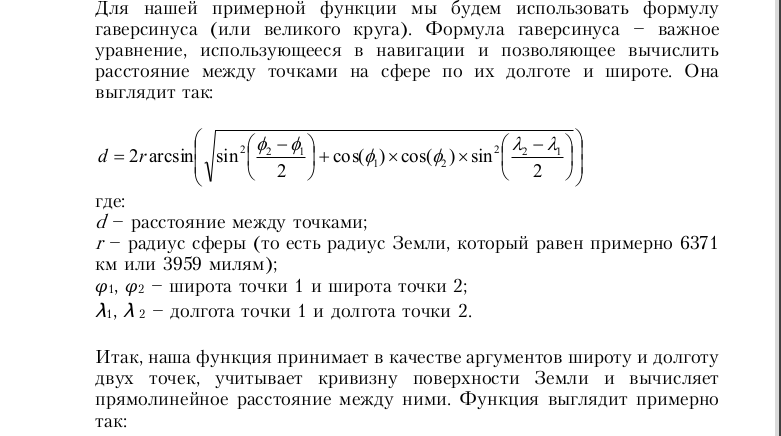

In [5]:
# пишем функцию, которая вычисляет формулу гаверсинусов
def haversine(lat1, lon1, lat2, lon2):
    RADIUS = 6371.2
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    total_km = RADIUS * c
    return total_km

####  Координаты Москвы - 55.7522, 37.6156

In [6]:
# задаем функцию, которая просто перебирает все строки
# и возвращает серию с расстояниями, вычисленными по формуле гаверсинусов

def haversine_looping(df):
    distance_list = []
    for i in range(len(df)):
        d = haversine(55.7522, 37.6156, df.iloc[i]['Широта'], df.iloc[i]['Долгота'])
        distance_list.append(d)
    return distance_list

In [7]:
%%timeit

# запускаем итеративную функцию haversine
df['Расстояние'] = haversine_looping(df) 

354 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit

# запускаем итерирование с помощью метода .iterrrows()
haversine_series = []
for index, row in df.iterrows():
    haversine_series.append(haversine(55.7522, 37.6156, row['Широта'], row['Долгота']))
df['Расстояние'] = haversine_series

163 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit

# применяем функцию haversine с помощью метода .apply()
df['Расстояние'] = df.apply(lambda row: haversine(55.7522, 37.6156, row['Широта'], row['Долгота']), axis=1)

54.9 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit

# векторизированная реализация функции haversine, используем объекты Series целиком
df['Расстояние'] = haversine(55.7522, 37.6156, df['Широта'], df['Долгота'])

2.96 ms ± 82.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit

# векторизированная реализация функции haversine,
# используем вместо объектов Series массивы NumPy
df['Расстояние'] = haversine(55.7522, 37.6156, df['Широта'].values, df['Долгота'].values)

356 µs ± 9.29 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
df['Расстояние'] = df['Расстояние'].round(2)

In [13]:
df[["Город",'Расстояние']].head()

,Город,Расстояние
0,Адыгейск,1214.23
1,Майкоп,1251.38
2,Горно-Алтайск,3133.04
3,Алейск,2912.42
4,Барнаул,2933.70


In [14]:
df[["Город",'Расстояние']].query('Город == "Владивосток"')

,Город,Расстояние
713,Владивосток,6415.71


In [15]:
df1 = df[["Город",'Расстояние']]
df1 = df1.dropna()
df1.loc[df1['Город'].str.contains('М')]

,Город,Расстояние
1,Майкоп,1251.38
30,Мезень,1176.56
31,Мирный,794.75
54,Межгорье,1303.84
55,Мелеуз,1222.65
...,...,...
1049,Миньяр,1256.18
1071,Мариинский Посад,629.76
1084,Мирный,4155.84
1095,Муравленко,2210.05


In [16]:
# Колонка <Город> становится индексом
df2 = df1.set_index("Город")
df2.head()

,Расстояние
Город,
Адыгейск,1214.23
Майкоп,1251.38
Горно-Алтайск,3133.04
Алейск,2912.42
Барнаул,2933.70


In [17]:
df2.loc[["Майкоп"]]

,Расстояние
Город,
Майкоп,1251.38


In [18]:
df2 = df2.sort_index()

In [19]:
df2

,Расстояние
Город,
Абаза,3347.84
Абакан,3375.37
Абдулино,1052.71
Абинск,1210.92
Агидель,1016.30
...,...
Ярославль,250.25
Ярцево,320.37
Ясногорск,141.60


In [20]:
# Получение номера индекса по значению(имени) индекса
idx_omsk = df2.index.get_loc("Омск")
idx_orenburg = df2.index.get_loc("Оренбург")
idx_omsk, idx_orenburg

(703, 707)

In [21]:
df2.loc["Омск": "Оренбург"] # Последний элемент входит в выдачу

,Расстояние
Город,
Омск,2235.75
Омутнинск,933.36
Онега,908.21
Опочка,562.56
Оренбург,1226.75


In [22]:
df2.iloc[703:708]  # Последний элемент не входит в выдачу

,Расстояние
Город,
Омск,2235.75
Омутнинск,933.36
Онега,908.21
Опочка,562.56
Оренбург,1226.75
